# the purpose of this code is to visualize the SNe catalog for type IIb supernovae.



In [3]:
#import everything
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import pylab as pl
from astropy import units as u
from astropy.coordinates import SkyCoord

In [5]:
#upload the data as a pandas dataframe and filter for just IIb, then get just RA and distance and brightness

all_sne=pd.read_csv('../../../../datasets/OpenSNCat.csv')
IIb_ra = all_sne.loc[(all_sne["Type"]=='IIb') & (~pd.isnull(all_sne['R.A.'])) & (~pd.isnull(all_sne['Mmax']))]

all_RA = IIb_ra["R.A."]
RA=[x.split(',')[0] for x in all_RA.values]

IIb_dec = all_sne.loc[(all_sne["Type"]=='IIb') & (~pd.isnull(all_sne['Dec.'])) & (~pd.isnull(all_sne['Mmax']))]

all_dec= IIb_dec["Dec."]
dec=[x.split(',')[0] for x in all_dec.values]



In [6]:
#convert RA to azimuth and dec to altitude:

def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return float(h) * 3600 + float(m) * 60 + float(s)


def get_deg(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return float(h) + (float(m) * 60 + float(s))/3600.



azimuth=[]
for each in RA:
    azimuth.append(float(get_sec(each))/3600.)
    

altitude=[]
for each in dec:
    altitude.append(float(get_deg(each)))
    

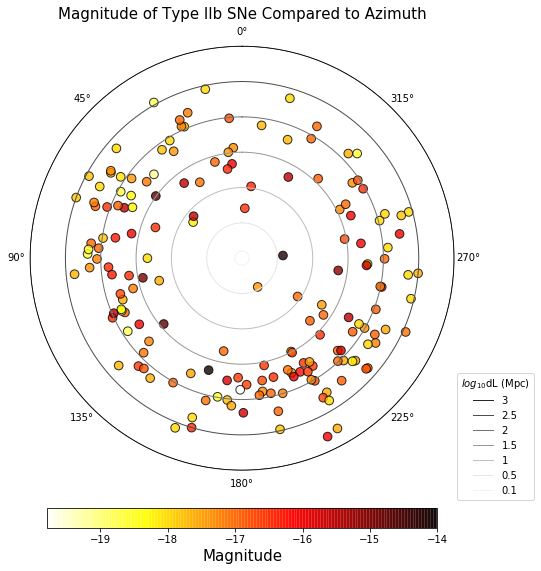

In [6]:
#Make a polar plot to compare the magntiude to the azimuth

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)


#create concentric colored rings instead of the default grid and text
ax.set_ylim(0, 3.)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*3, color= (.15,.15,.15), linestyle='-', label='3', linewidth=1)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*2.5, color=(.3,.3,.3), linestyle='-', label='2.5', linewidth=1)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*2, color=(0.45,.45,.45), linestyle='-', label='2', linewidth=1)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*1.5, color=(.6,.6,.6), linestyle='-', label='1.5', linewidth=1)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*1, color=(0.75,.75,.75), linestyle='-', label='1', linewidth=1)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*0.5, color=(.9,.9,.9), linestyle='-', label='0.5', linewidth=1)
ax.plot(np.linspace(0, 2*np.pi, 1000), np.ones(1000)*0.1, color=(.95,.95,.95), linestyle='-', label='0.1', linewidth=1)
ax.grid(False)



ax.legend(loc='right', bbox_to_anchor=(1.2, 0.08),prop={'size': 10}, 
          title=r"$log_{10}$dL (Mpc)", fontsize='medium', fancybox=True)
ax.set_yticklabels([])
ax.set_theta_zero_location("N")
ax.set_title('Magnitude of Type IIb SNe Compared to Azimuth', fontsize=15)
im = ax.scatter(azimuth, np.log10(IIb_ra["dL (Mpc)"]), c=IIb_ra['Mmax'], 
                edgecolors = 'black',  s=75, vmin=min(IIb_ra['Mmax']), 
                vmax=np.max(IIb_ra['Mmax']), cmap='hot_r', alpha=0.8)

a = fig.colorbar(im,ax=ax, orientation='horizontal', shrink=.7, pad=0.07 )
a.set_label(label='Magnitude', fontsize=15)


plt.show()



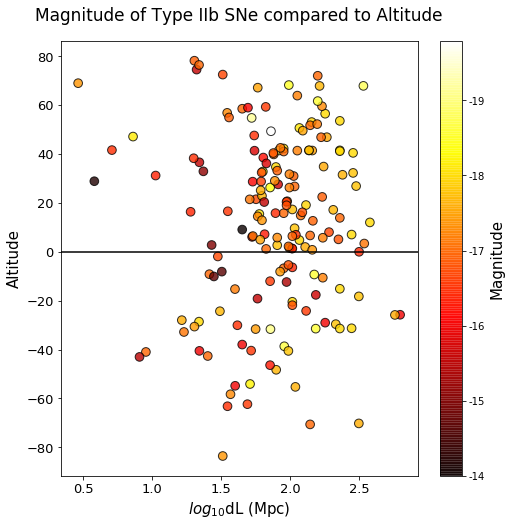

In [7]:
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111)

im = ax2.scatter(np.log10(IIb_dec["dL (Mpc)"]), altitude, c=-1*IIb_dec['Mmax'],edgecolors = 'black',  s=75, vmin=-1*min(IIb_ra['Mmax']), 
                vmax=-1*np.max(IIb_ra['Mmax']), cmap='hot', alpha=0.8)
ax2.set_ylabel('Altitude',fontsize=15)
ax2.set_xlabel(r"$log_{10}$dL (Mpc)",fontsize=15)
ax2.axhline(y=0, color='black')
ax2.set_title('Magnitude of Type IIb SNe compared to Altitude', fontsize=17, pad=20)
ax2.tick_params(labelsize=13)
cbar = fig2.colorbar(im)
cbar.ax.set_yticklabels([-14, -15, -16, -17, -18, -19])  
cbar.set_label(label='Magnitude', fontsize=15)



plt.show()